## Altmap Experiments
### Compare altmap to map eq using networkx


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

plt.rcParams.update({'font.size': 14})
%pylab

%run helpers.py
# loads the following helper functions:
# infomap(net_path, altmap=False, additional_args='')
# read_tree(tree_path)
# drawNetwork(G, communities)
# altmap_cost(G, communities)
# generate_initfile(G, method='random')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
num_cliques = 5
clique_size = 50
N = num_cliques * clique_size # num nodes
G = nx.ring_of_cliques(num_cliques, clique_size)
G = nx.convert_node_labels_to_integers(G, first_label=1)

communities = {}
for c in range(num_cliques):
    for n in range(1, clique_size+1):
        communities[c*clique_size + n] = c
        
cost = altmap_cost(G, communities)
print (f'Ground Truth L = {cost}\n')


Ground Truth L = -2.310761626697072



In [14]:
nx.write_pajek(G, workspace_path +  filename + '.net')
# infomap(altmap=False)
# infomap(altmap=True)
communities = generate_initfile(G, method='sc')
infomap(altmap=True, additional_args=' --cluster-data ./workspace/init.tree')

# read results
communities_found, num_communities_found = read_communities_from_tree_file()
print (communities_found)
print (f'We found {num_communities_found} communities.')

cost = altmap_cost(G, communities_found)
print (f'Achieved cost L = {cost}')


OrderedDict([(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 2), (54, 2), (55, 2), (56, 2), (57, 2), (58, 2), (59, 2), (60, 2), (61, 2), (62, 2), (63, 2), (64, 2), (65, 2), (66, 2), (67, 2), (68, 2), (69, 2), (70, 2), (71, 2), (72, 2), (73, 2), (74, 2), (75, 2), (76, 2), (77, 2), (78, 2), (79, 2), (80, 2), (81, 2), (82, 2), (83, 2), (84, 2), (85, 2), (86, 2), (87, 2), (88, 2), (89, 2), (90, 2), (91, 2), (92, 2), (93, 2), (94, 2), (95, 2), (96, 2), (97, 2), (98, 2), (99, 2), (100, 2), (101, 3), (102, 3), (103, 3), (104, 3), (105, 3), (106, 3), (107, 3), (108, 3), (109, 3), (110,

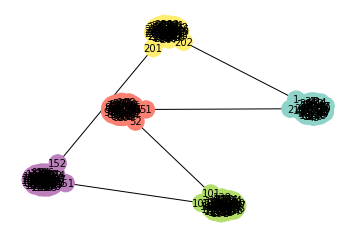

In [6]:
plt.close('all')
plt.figure()
drawNetwork(G, communities_found)